In [4]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached grpcio-1.54.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 8.9 MB/s eta 0:00:00:00:0100:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached libclang-16.0.0-py2.py3-none-manylinux2010_x86_64.whl (22.9 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached tensorflow_io_gcs_filesystem-0.32.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (77 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.regularizers import l1_l2

# Load the dataset
df = pd.read_csv('qubits_4_final.csv')
X = df.drop(['label'], axis=1)
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(64, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Bidirectional(LSTM(32, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))))
model.add(Dense(100, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(200, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(400, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

y_pred=model.predict(X_test)


2023-05-06 14:35:48.913428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 14:35:48.915863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 14:35:48.917292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-05-06 14:35:50.886912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 14:35:50.889521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 14:35:50.891693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

254/258 [============================>.] - ETA: 0s - loss: 17.0293 - accuracy: 0.7739

2023-05-06 14:36:00.904427: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 14:36:00.906748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 14:36:00.908198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

258/258 [==============================] - 12s 19ms/step - loss: 16.7878 - accuracy: 0.7728 - val_loss: 0.7647 - val_accuracy: 0.7824
Epoch 2/10
258/258 [==============================] - 3s 11ms/step - loss: 0.7540 - accuracy: 0.7740 - val_loss: 0.7363 - val_accuracy: 0.7824
Epoch 3/10
258/258 [==============================] - 3s 11ms/step - loss: 0.7352 - accuracy: 0.7740 - val_loss: 0.7202 - val_accuracy: 0.7824
Epoch 4/10
258/258 [==============================] - 3s 10ms/step - loss: 0.7248 - accuracy: 0.7740 - val_loss: 0.7131 - val_accuracy: 0.7824
Epoch 5/10
258/258 [==============================] - 3s 11ms/step - loss: 0.7205 - accuracy: 0.7740 - val_loss: 0.7098 - val_accuracy: 0.7824
Epoch 6/10
258/258 [==============================] - 3s 10ms/step - loss: 0.7191 - accuracy: 0.7740 - val_loss: 0.7082 - val_accuracy: 0.7824
Epoch 7/10
258/258 [==============================] - 3s 10ms/step - loss: 0.7165 - accuracy: 0.7740 - val_loss: 0.7062 - val_accuracy: 0.7824
Epoch 8/

2023-05-06 14:36:27.788082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 14:36:27.789951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 14:36:27.791242: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 2s 3ms/step


In [21]:
# Evaluate the model on the test set
_, accuracy = model.evaluate(y_pred, y_test)
print('Accuracy: %.2f%%' % (accuracy*100))


2023-05-06 14:36:35.455549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-06 14:36:35.457644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-06 14:36:35.459345: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

65/65 [==============================] - 2s 3ms/step - loss: 0.7072 - accuracy: 0.7824
Accuracy: 78.24%


In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

0.782355792535143


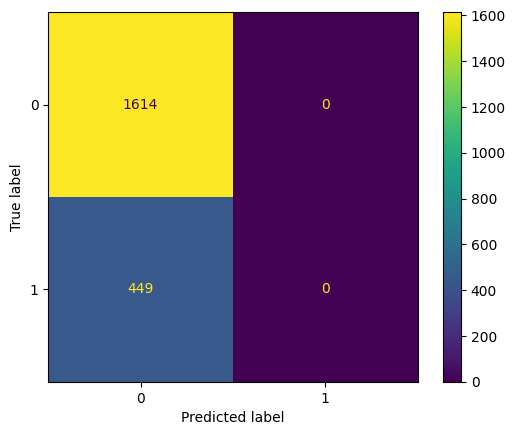

In [23]:
y_pred=np.round(y_pred)

cm = confusion_matrix(y_test, y_pred)


cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm)

cm_display.plot()

ac=accuracy_score(y_pred,y_test)
print(ac)
plt.show()

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.78      0.88      2063
         1.0       0.00      0.00      0.00         0

    accuracy                           0.78      2063
   macro avg       0.50      0.39      0.44      2063
weighted avg       1.00      0.78      0.88      2063



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
